In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from collections import deque

In [2]:
"""
for google colab support
"""

from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/BA/CSV-Files '

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Mounted at /content/gdrive
['Ex12.xlsx', 'SimulationOneDisease.ipynb', 'Statistics.ipynb', 'Untitled0.ipynb', 'cities.csv', 'disease_counters.csv', 'edges.csv', 'node_positions.csv', 'pandemic_all_strategies_results.csv', 'pandemic_all_strategies_results2.csv', 'pandemic_baseline_results.csv', 'pandemic_baseline_results2.csv']


In [ ]:
baseline_df = pd.read_csv('pandemic_baseline_results.csv')

In [ ]:
unique_no_epidemics = sorted(baseline_df['no_epidemic'].unique())
print(unique_no_epidemics)

[0, 1, 2, 3, 4, 5, 6]


In [ ]:
unique_k_actions = sorted(baseline_df['k_actions'].unique())
print(unique_k_actions)

[0]


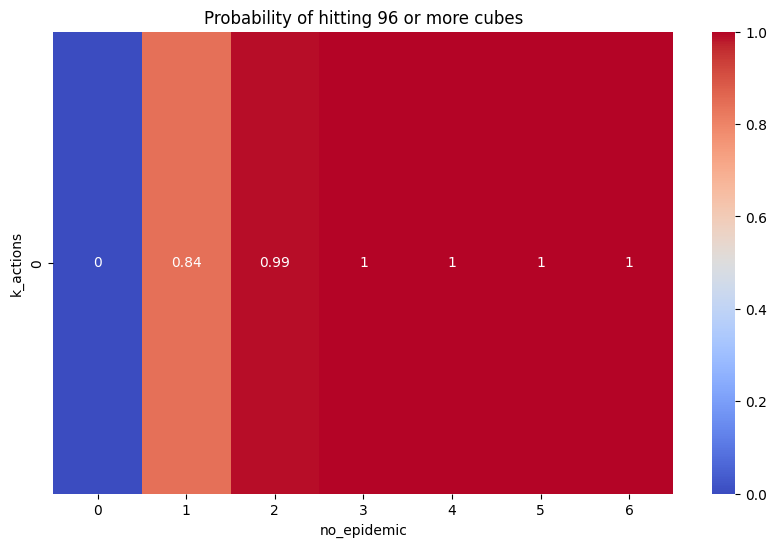

In [ ]:
# Initialize a 2D array to store probabilities
probabilities = np.zeros((len(unique_k_actions), len(unique_no_epidemics)))  # Swapping dimensions

# Iterate over all combinations of 'no_epidemic' and 'k_actions'
for i, no_epi in enumerate(unique_no_epidemics):
    for j, k_act in enumerate(unique_k_actions):  # Adjusted indices
        # Filter the DataFrame based on the current combination
        filtered_df = baseline_df[(baseline_df['no_epidemic'] == no_epi) & (baseline_df['k_actions'] == k_act)]

        # Initialize counter for this combination
        count = 0

        # Iterate over each run in the filtered DataFrame
        for _, run in filtered_df.groupby('run'):
            # Calculate the total number of cubes for each timestep in the run
            total_cubes_per_timestep = run['infection_1_nodes'] + 2 * run['infection_2_nodes'] + 3 * run['infection_3_nodes']
            # Check if any timestep within the run has 96 or more cubes
            if (total_cubes_per_timestep >= 96).any():
                count += 1

        # Calculate the probability
        probability = count / 100

        # Store the probability in the 2D array
        probabilities[j, i] = probability

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(probabilities, cmap='coolwarm', annot=True, xticklabels=unique_no_epidemics, yticklabels=unique_k_actions)  # Adjusted labels
plt.xlabel('no_epidemic')  # Adjusted label
plt.ylabel('k_actions')  # Adjusted label
plt.title('Probability of hitting 96 or more cubes')
plt.show()

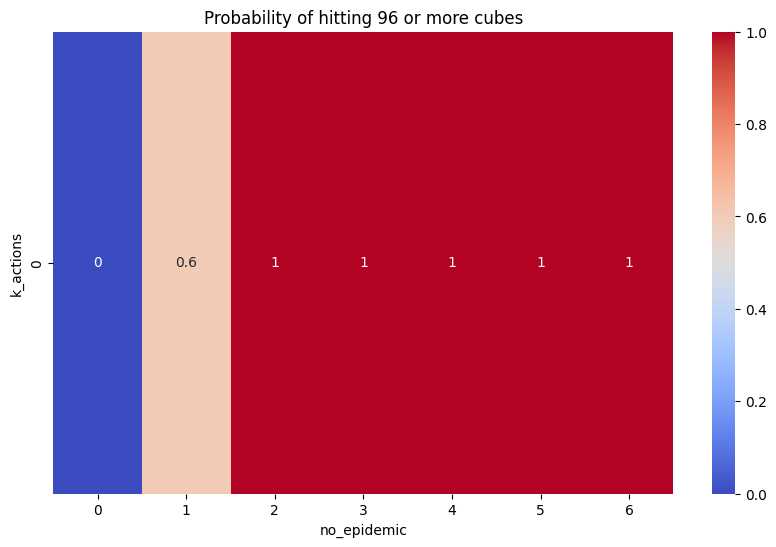

In [ ]:
baseline_df2 = pd.read_csv('pandemic_baseline_results2.csv')
# Initialize a 2D array to store probabilities
probabilities = np.zeros((len(unique_k_actions), len(unique_no_epidemics)))  # Swapping dimensions

# Iterate over all combinations of 'no_epidemic' and 'k_actions'
for i, no_epi in enumerate(unique_no_epidemics):
    for j, k_act in enumerate(unique_k_actions):  # Adjusted indices
        # Filter the DataFrame based on the current combination
        filtered_df = baseline_df2[(baseline_df2['no_epidemic'] == no_epi) & (baseline_df2['k_actions'] == k_act)]

        # Initialize counter for this combination
        count = 0

        # Iterate over each run in the filtered DataFrame
        for _, run in filtered_df.groupby('run'):
            # Calculate the total number of cubes for each timestep in the run
            total_cubes_per_timestep = run['infection_1_nodes'] + 2 * run['infection_2_nodes'] + 3 * run['infection_3_nodes']
            # Check if any timestep within the run has 96 or more cubes
            if (total_cubes_per_timestep >= 96).any():
                count += 1

        # Calculate the probability
        probability = count / 100

        # Store the probability in the 2D array
        probabilities[j, i] = probability

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(probabilities, cmap='coolwarm', annot=True, xticklabels=unique_no_epidemics, yticklabels=unique_k_actions)  # Adjusted labels
plt.xlabel('no_epidemic')  # Adjusted label
plt.ylabel('k_actions')  # Adjusted label
plt.title('Probability of hitting 96 or more cubes')
plt.show()

In [ ]:
df = pd.read_csv('pandemic_all_strategies_results.csv')

In [ ]:
random_setup_df = df[df['setup'] == 'random']
print(random_setup_df)


         setup  run  k_actions  no_epidemic  timestep  susceptible_nodes  \
0       random    1          1            0        -1                 39   
1       random    1          1            0         0                 38   
2       random    1          1            0         1                 36   
3       random    1          1            0         2                 34   
4       random    1          1            0         3                 32   
...        ...  ...        ...          ...       ...                ...   
673195  random  700          8            6        22                 43   
673196  random  700          8            6        23                 44   
673197  random  700          8            6        24                 44   
673198  random  700          8            6        25                 44   
673199  random  700          8            6        26                 40   

        infection_1_nodes  infection_2_nodes  infection_3_nodes  \
0                   

In [ ]:
unique_k_actions = sorted(random_setup_df['k_actions'].unique())
print(unique_k_actions)

[1, 2, 3, 4, 5, 6, 7, 8]


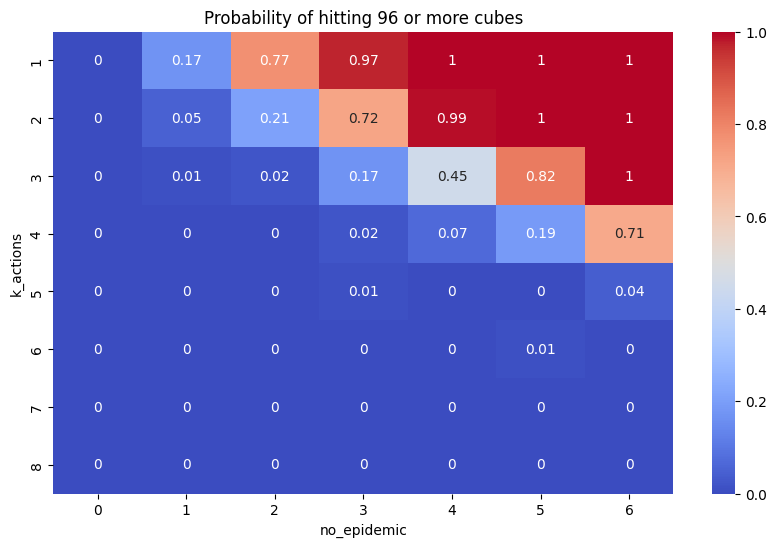

In [ ]:
# Initialize a 2D array to store probabilities
probabilities = np.zeros((len(unique_k_actions), len(unique_no_epidemics)))  # Swapping dimensions

# Iterate over all combinations of 'no_epidemic' and 'k_actions'
for i, no_epi in enumerate(unique_no_epidemics):
    for j, k_act in enumerate(unique_k_actions):  # Adjusted indices
        # Filter the DataFrame based on the current combination
        filtered_df = random_setup_df[(random_setup_df['no_epidemic'] == no_epi) & (random_setup_df['k_actions'] == k_act)]

        # Initialize counter for this combination
        count = 0

        # Iterate over each run in the filtered DataFrame
        for _, run in filtered_df.groupby('run'):
            # Calculate the total number of cubes for each timestep in the run
            total_cubes_per_timestep = run['infection_1_nodes'] + 2 * run['infection_2_nodes'] + 3 * run['infection_3_nodes']
            # Check if any timestep within the run has 96 or more cubes
            if (total_cubes_per_timestep >= 96).any():
                count += 1

        # Calculate the probability
        probability = count / 100

        # Store the probability in the 2D array
        probabilities[j, i] = probability

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(probabilities, cmap='coolwarm', annot=True, xticklabels=unique_no_epidemics, yticklabels=unique_k_actions)  # Adjusted labels
plt.xlabel('no_epidemic')  # Adjusted label
plt.ylabel('k_actions')  # Adjusted label
plt.title('Probability of hitting 96 or more cubes')
plt.show()

In [ ]:
def calculate_probability_heatmap(df, setup_name):
    # Filter the DataFrame for the specified setup
    setup_df = df[df['setup'] == setup_name]

    # Define the unique values of 'no_epidemic' and 'k_actions'
    unique_no_epidemics = sorted(setup_df['no_epidemic'].unique())
    unique_k_actions = sorted(setup_df['k_actions'].unique())

    # Initialize a 2D array to store probabilities
    probabilities = np.zeros((len(unique_k_actions), len(unique_no_epidemics)))  # Swapping dimensions

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for i, no_epi in enumerate(unique_no_epidemics):
        for j, k_act in enumerate(unique_k_actions):  # Adjusted indices
            # Filter the DataFrame based on the current combination
            filtered_df = setup_df[(setup_df['no_epidemic'] == no_epi) & (setup_df['k_actions'] == k_act)]

            # Initialize counter for this combination
            count = 0

            # Iterate over each run in the filtered DataFrame
            for _, run in filtered_df.groupby('run'):
                # Calculate the total number of cubes for each timestep in the run
                total_cubes_per_timestep = run['infection_1_nodes'] + 2 * run['infection_2_nodes'] + 3 * run['infection_3_nodes']
                # Check if any timestep within the run has 96 or more cubes
                if (total_cubes_per_timestep >= 96).any():
                    count += 1

            # Calculate the probability
            probability = count / 100

            # Store the probability in the 2D array
            probabilities[j, i] = probability

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(probabilities, cmap='coolwarm', annot=True, xticklabels=unique_no_epidemics, yticklabels=unique_k_actions)  # Adjusted labels
    plt.xlabel('no_epidemic')  # Adjusted label
    plt.ylabel('k_actions')  # Adjusted label
    plt.title(f'Probability of hitting 96 or more cubes for {setup_name} setup')
    plt.show()

In [3]:
strategies = ["random", "most_cubes", "highest_degree", "combined", "combinedV2"]

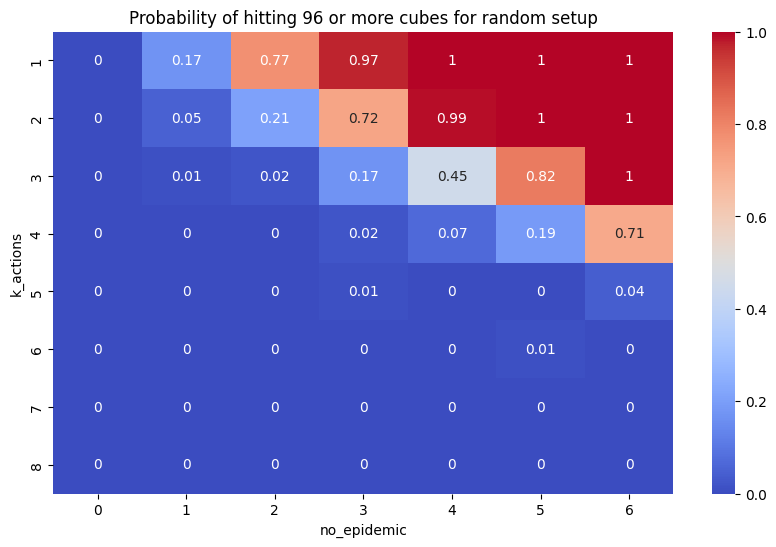

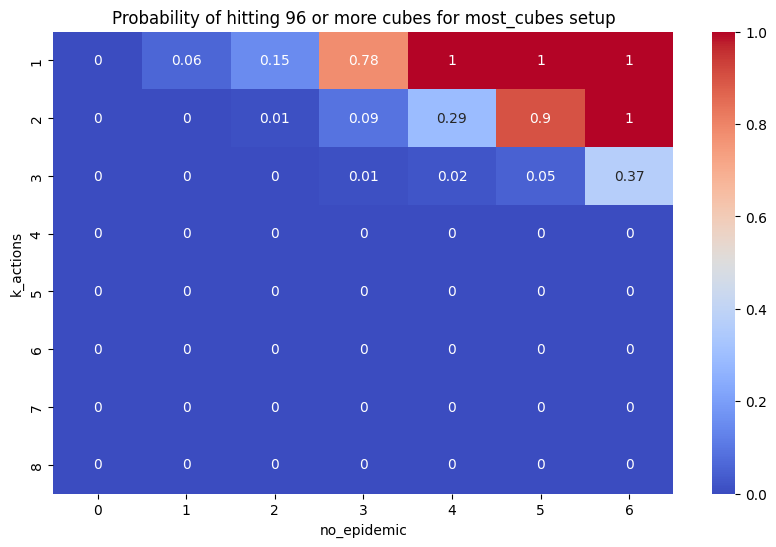

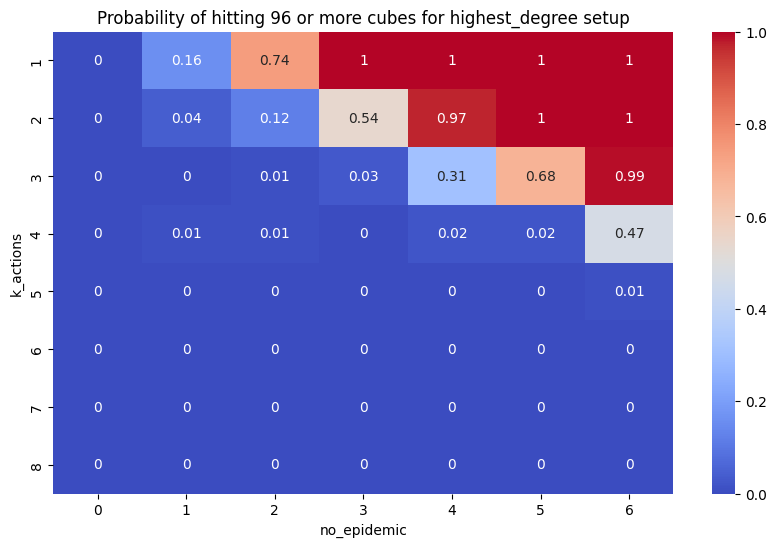

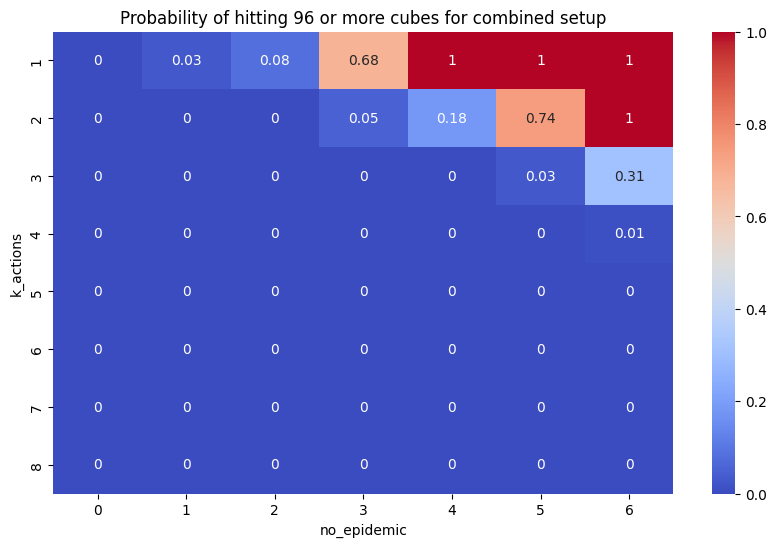

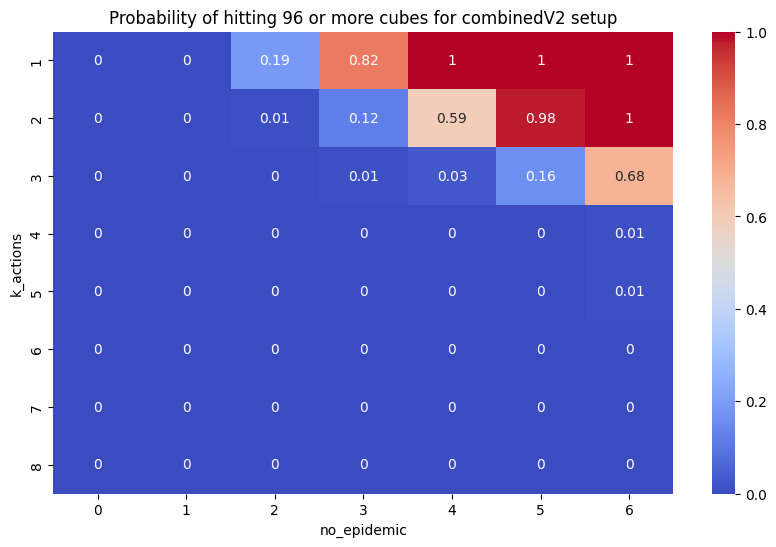

In [ ]:
for setup_name in strategies:
    calculate_probability_heatmap(df, setup_name)

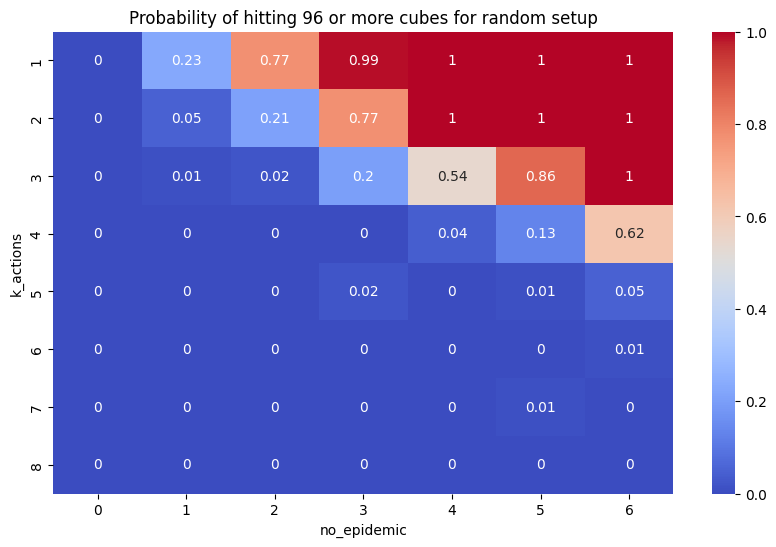

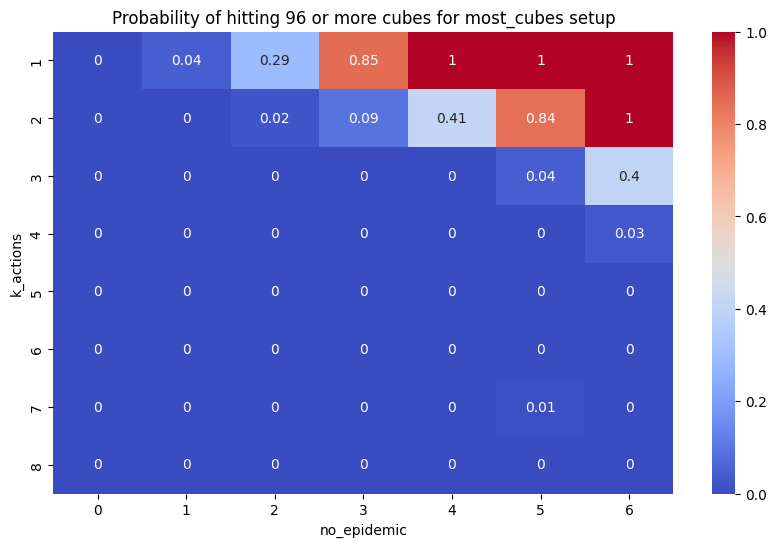

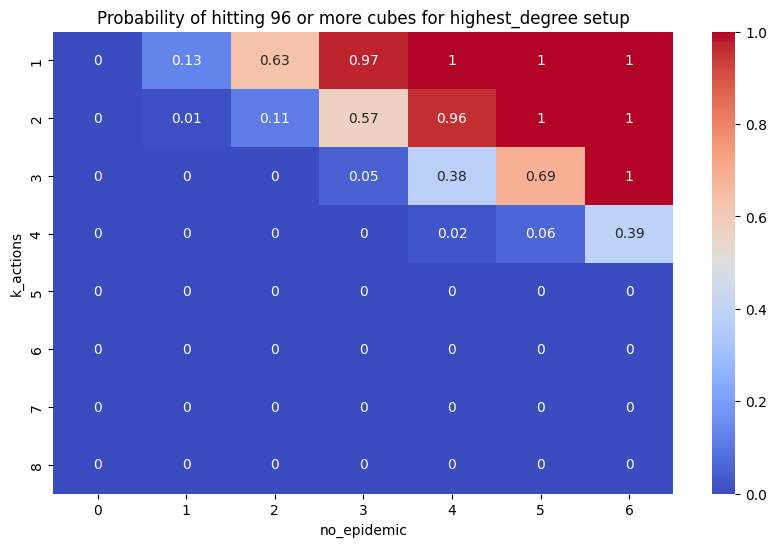

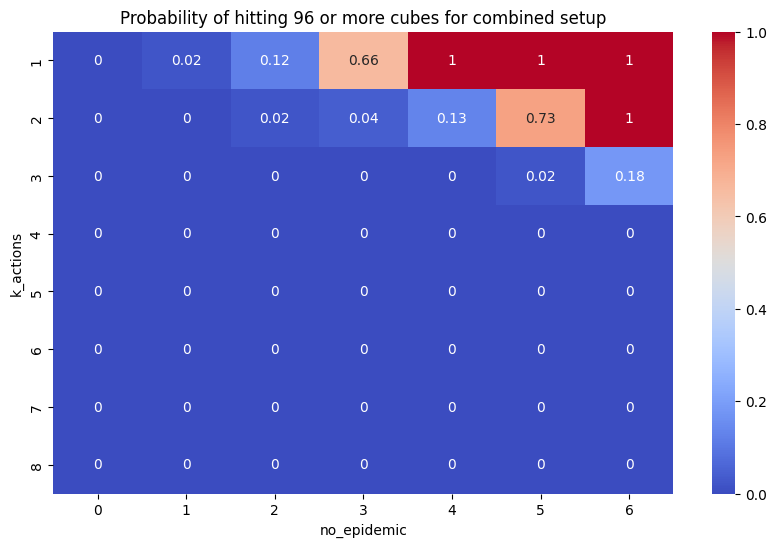

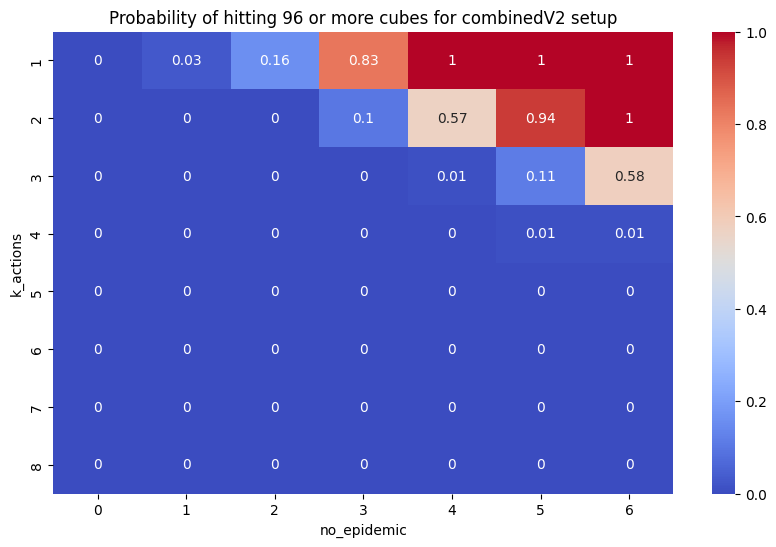

In [ ]:
df2 = pd.read_csv('pandemic_all_strategies_results2.csv')
for setup_name in strategies:
    calculate_probability_heatmap(df2, setup_name)

In [ ]:
def calculate_probability_heatmap(df, setup_name):
    # Filter the DataFrame for the specified setup
    setup_df = df[df['setup'] == setup_name]

    # Define the unique values of 'no_epidemic' and 'k_actions'
    unique_no_epidemics = sorted(setup_df['no_epidemic'].unique())
    unique_k_actions = sorted(setup_df['k_actions'].unique())

    # Initialize an empty list to store timestep data
    timestep_data = []

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for no_epi in unique_no_epidemics:
        for k_act in unique_k_actions:
            # Filter the DataFrame based on the current combination
            filtered_df = setup_df[(setup_df['no_epidemic'] == no_epi) & (setup_df['k_actions'] == k_act)]

            # Iterate over each run in the filtered DataFrame
            for _, run in filtered_df.groupby('run'):
                # Calculate the total number of cubes for each timestep in the run
                total_cubes_per_timestep = run['infection_1_nodes'] + 2 * run['infection_2_nodes'] + 3 * run['infection_3_nodes']
                # Check if any timestep within the run has 96 or more cubes
                if (total_cubes_per_timestep >= 96).any():
                    # Get the timestep where the condition is met
                    timestep = run.loc[total_cubes_per_timestep >= 96, 'timestep'].iloc[0]
                    timestep_data.append({'no_epidemic': no_epi, 'k_actions': k_act, 'timestep': timestep})

    # Create a DataFrame from the timestep data
    timestep_df = pd.DataFrame(timestep_data)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=timestep_df, x='no_epidemic', y='timestep', hue='k_actions')
    plt.xlabel('no_epidemic')
    plt.ylabel('Timestep when 96 cubes were reached')
    plt.title(f'Timestep of hitting 96 or more cubes for {setup_name} setup')
    plt.show()

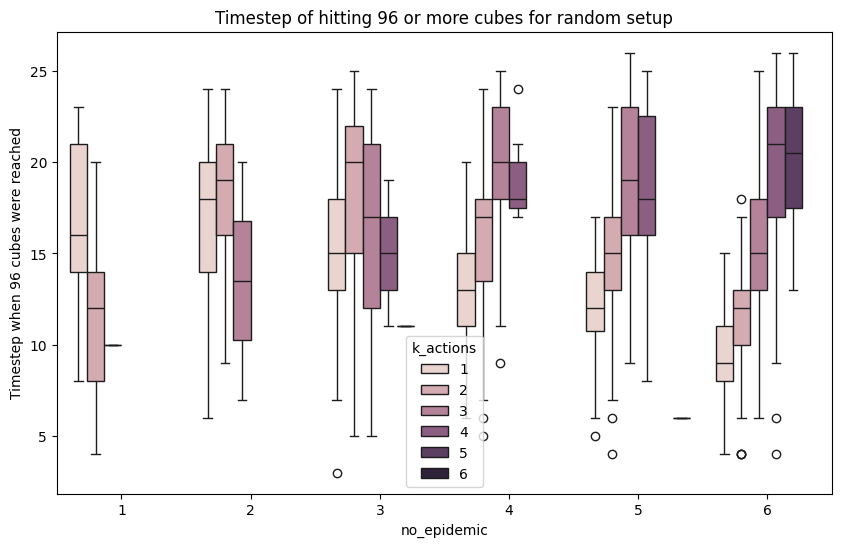

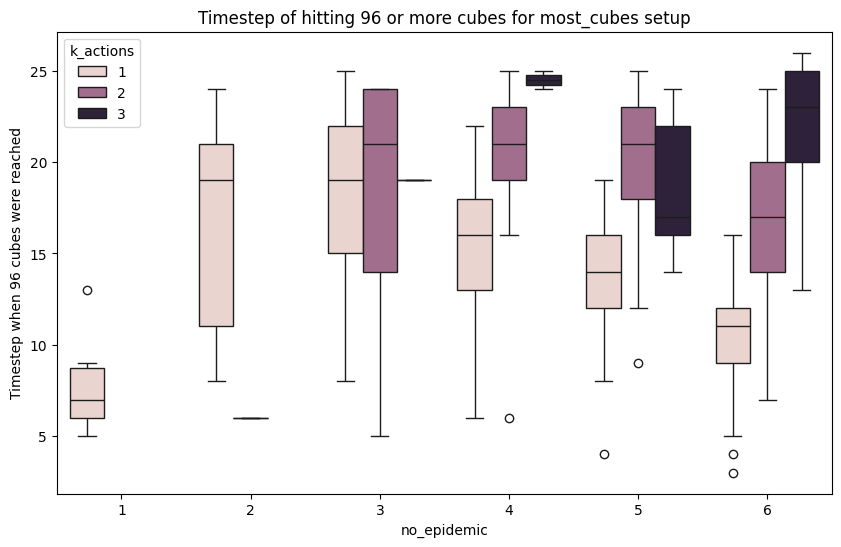

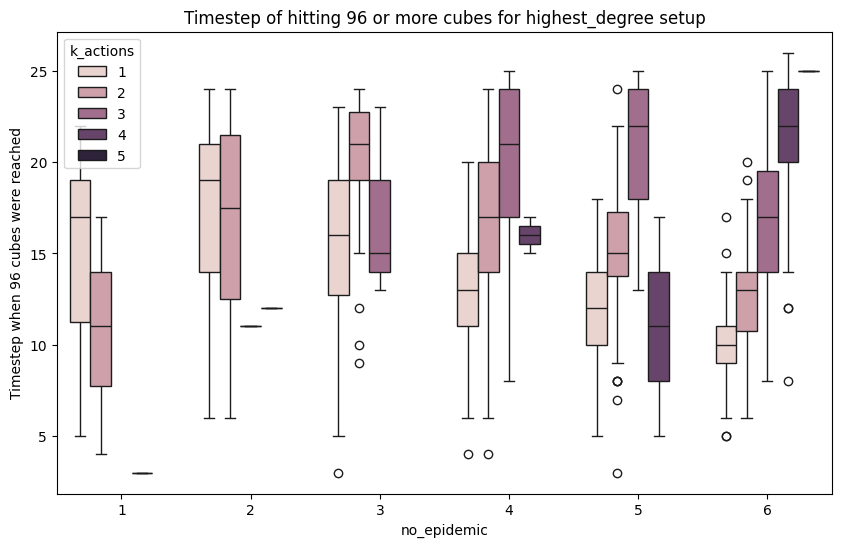

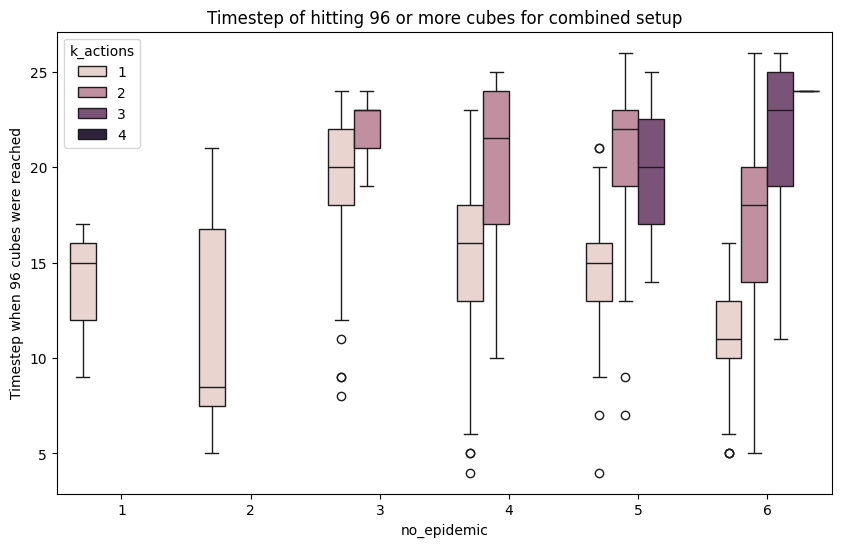

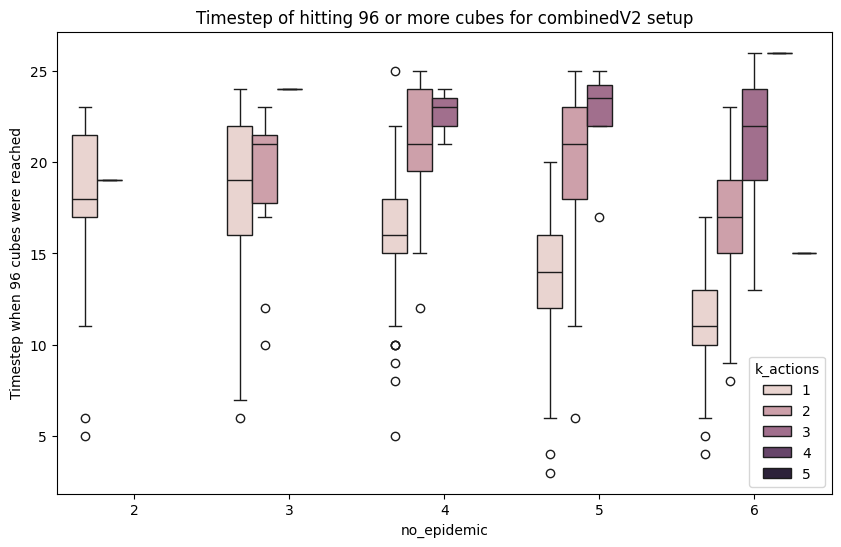

In [ ]:
for setup_name in strategies:
    calculate_probability_heatmap(df, setup_name)

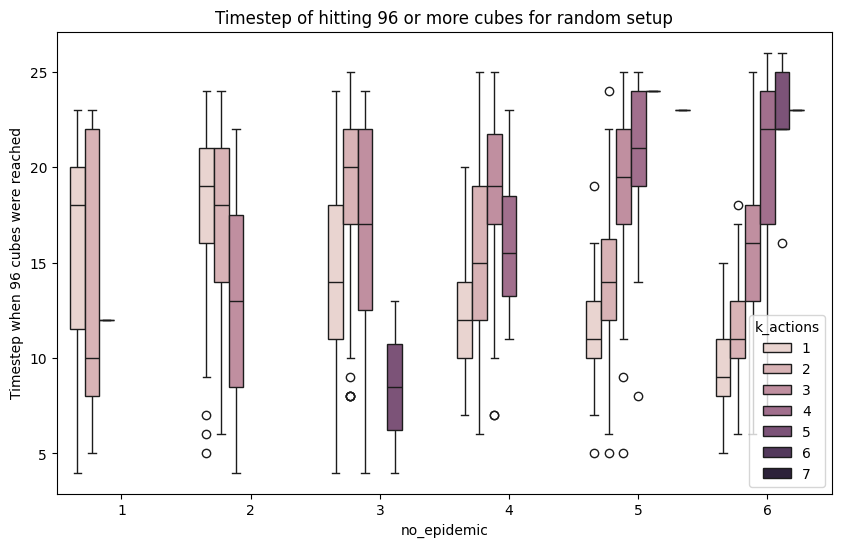

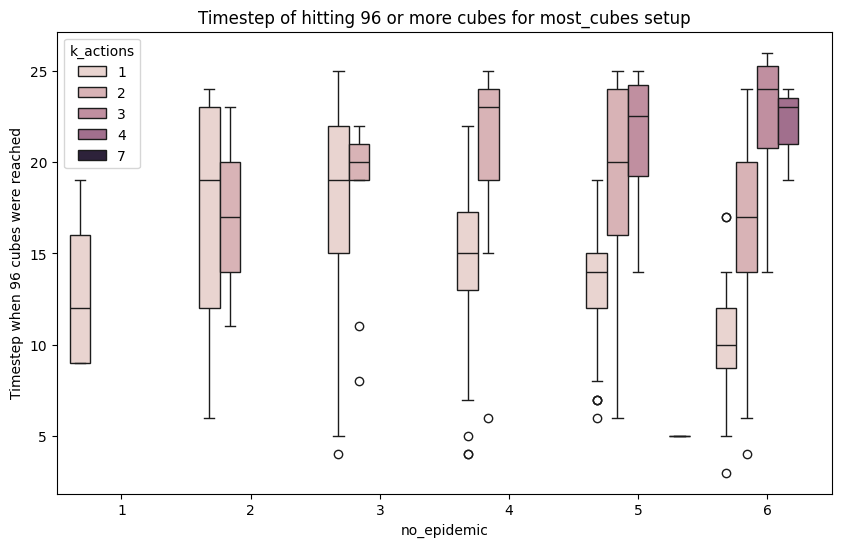

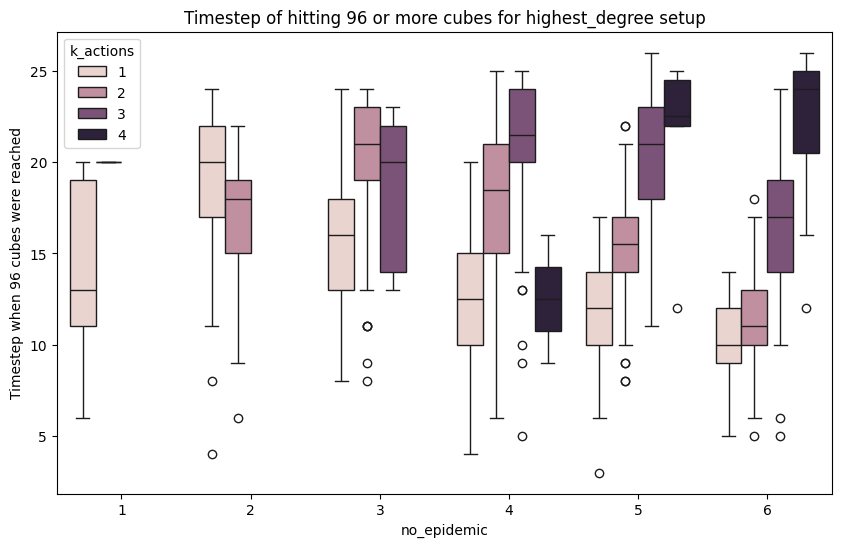

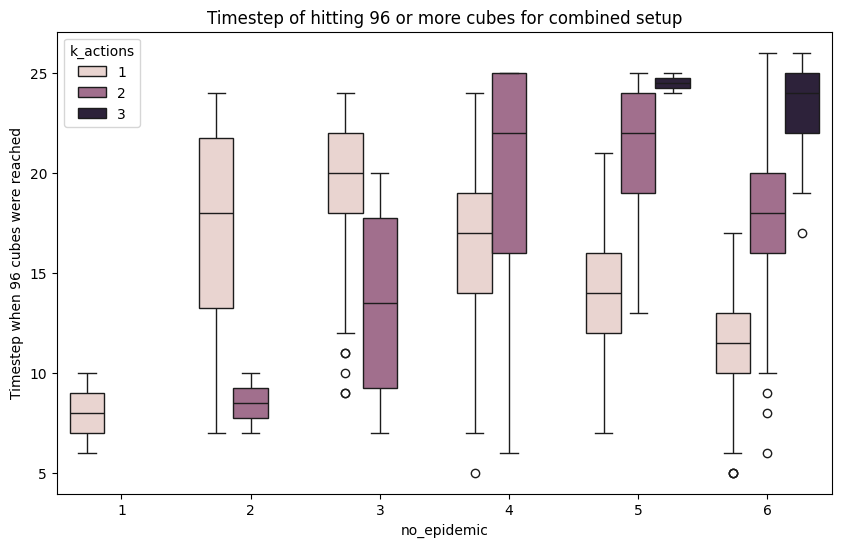

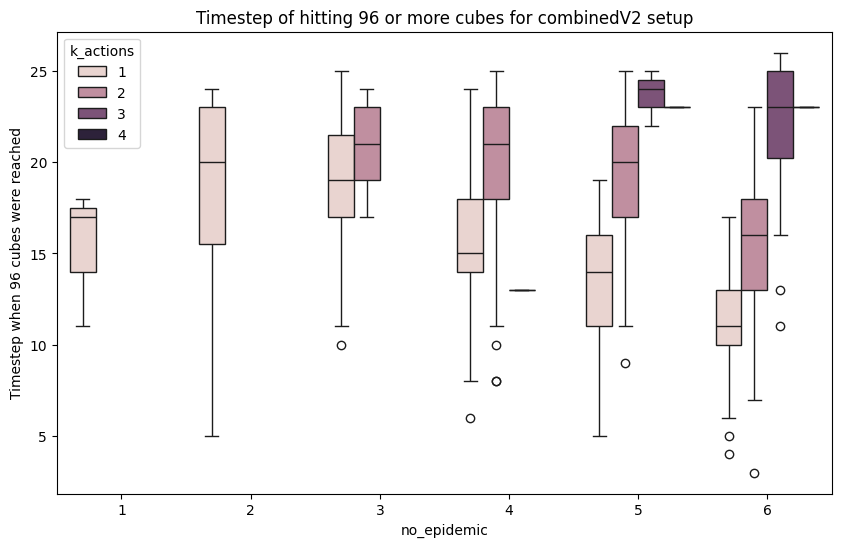

In [ ]:
for setup_name in strategies:
    calculate_probability_heatmap(df2, setup_name)

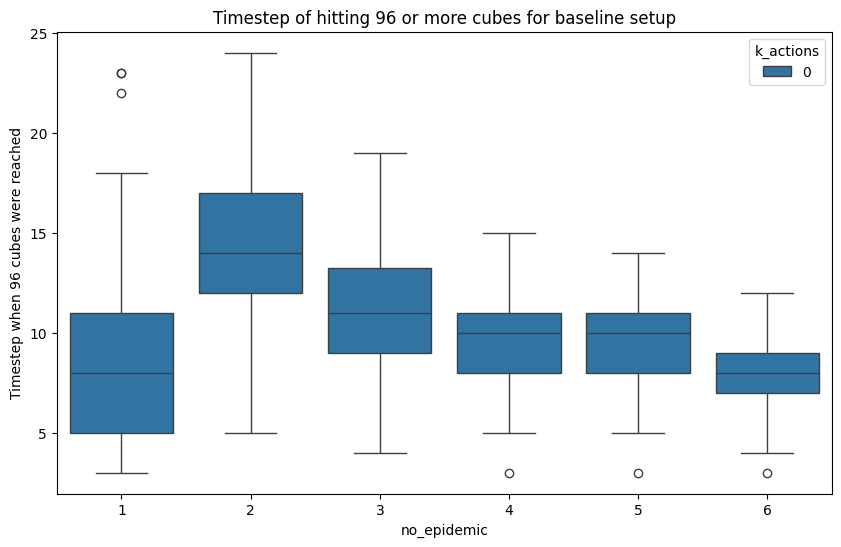

In [ ]:
baseline_df = pd.read_csv('pandemic_baseline_results.csv')

# Define the setup name
setup_name = "baseline"

# Call the function with your baseline_df and setup_name
calculate_probability_heatmap(baseline_df, setup_name)

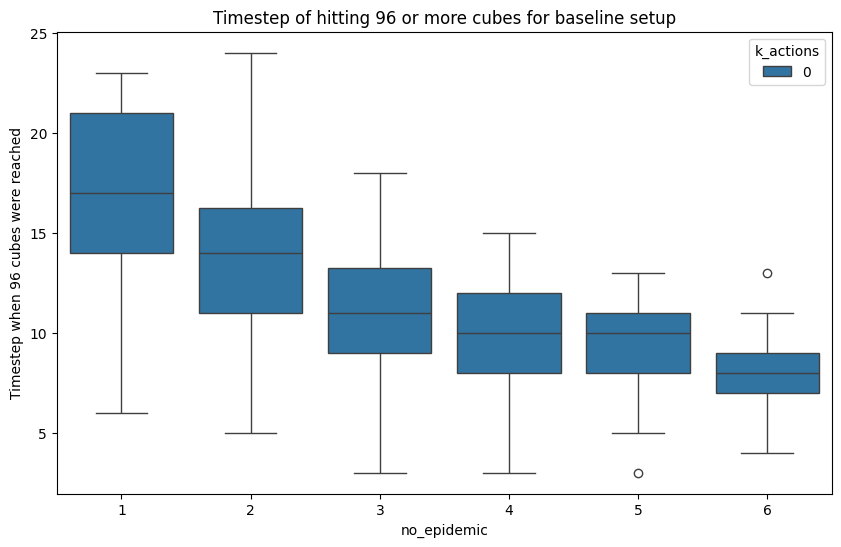

In [ ]:
baseline_df = pd.read_csv('pandemic_baseline_results2.csv')

# Define the setup name
setup_name = "baseline"

# Call the function with your baseline_df and setup_name
calculate_probability_heatmap(baseline_df, setup_name)

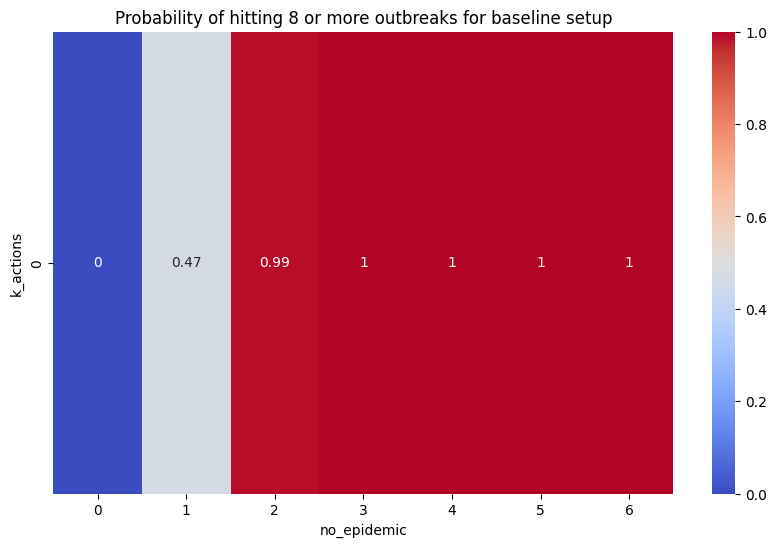

In [ ]:
def calculate_probability_heatmap(df, setup_name, condition_column, threshold):
    setup_df = df[df['setup'] == setup_name]

    # Define the unique values of 'no_epidemic' and 'k_actions'
    unique_no_epidemics = sorted(setup_df['no_epidemic'].unique())
    unique_k_actions = sorted(setup_df['k_actions'].unique())

    # Initialize a 2D array to store probabilities
    probabilities = np.zeros((len(unique_k_actions), len(unique_no_epidemics)))  # Swapping dimensions

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for i, no_epi in enumerate(unique_no_epidemics):
        for j, k_act in enumerate(unique_k_actions):  # Adjusted indices
            # Filter the DataFrame based on the current combination
            filtered_df = setup_df[(setup_df['no_epidemic'] == no_epi) & (setup_df['k_actions'] == k_act)]

            # Initialize counter for this combination
            count = 0

            # Iterate over each run in the filtered DataFrame
            for _, run in filtered_df.groupby('run'):
                # Check if any timestep within the run meets the condition
                if (run[condition_column] >= threshold).any():
                    count += 1

            # Calculate the probability
            probability = count / 100

            # Store the probability in the 2D array
            probabilities[j, i] = probability

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(probabilities, cmap='coolwarm', annot=True, xticklabels=unique_no_epidemics, yticklabels=unique_k_actions)  # Adjusted labels
    plt.xlabel('no_epidemic')  # Adjusted label
    plt.ylabel('k_actions')  # Adjusted label
    plt.title(f'Probability of hitting {threshold} or more {condition_column} for {setup_name} setup')
    plt.show()

# Example usage:
baseline_df = pd.read_csv('pandemic_baseline_results2.csv')
calculate_probability_heatmap(baseline_df, "baseline", "outbreaks", 8)

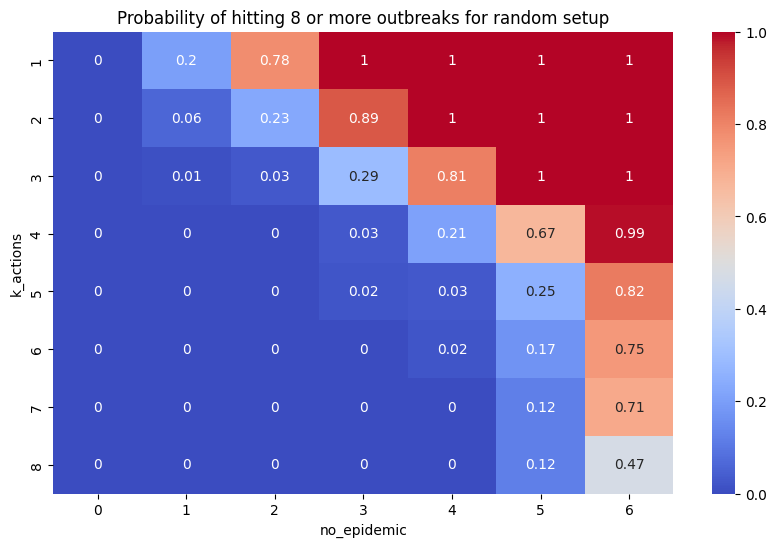

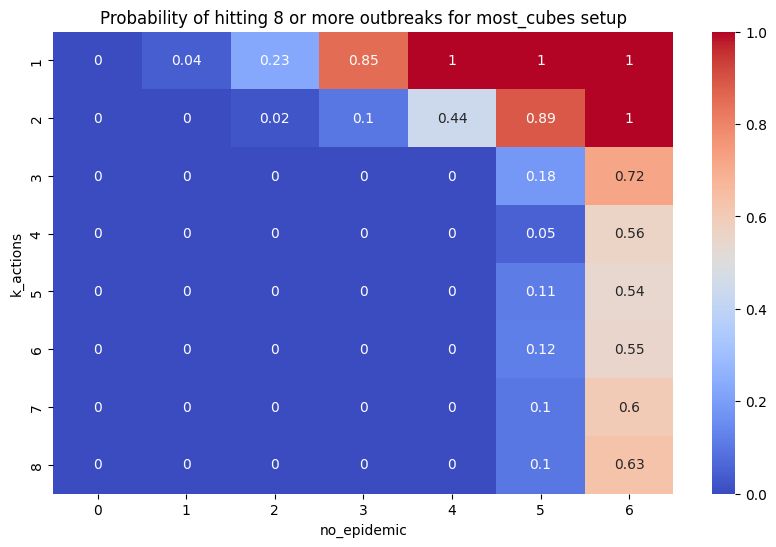

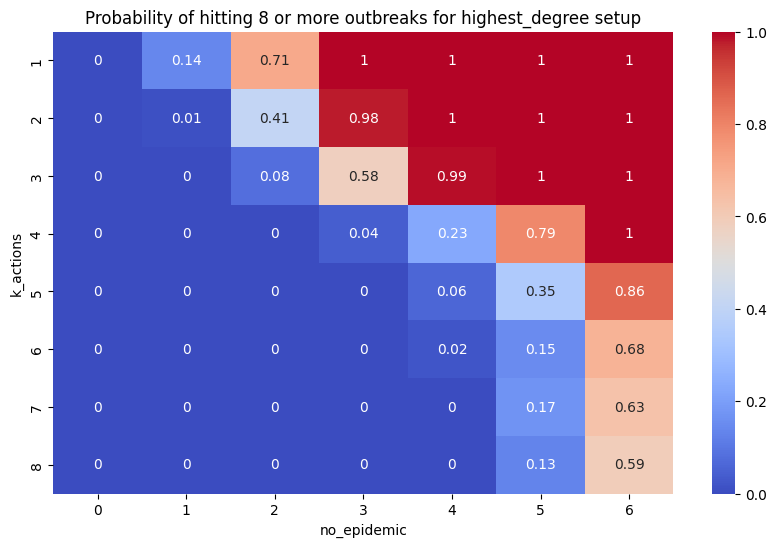

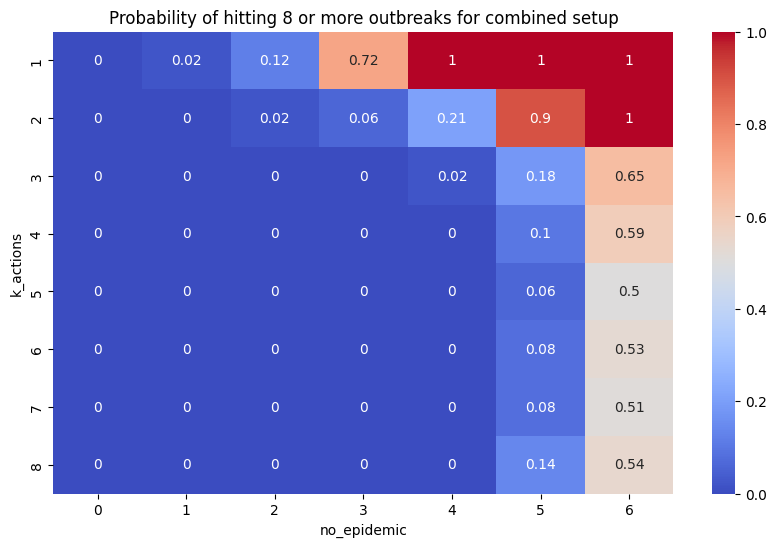

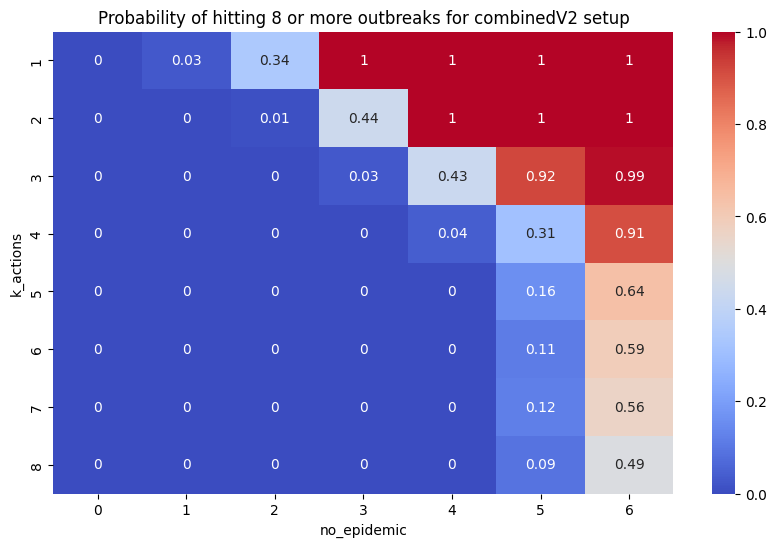

In [ ]:
def calculate_probability_heatmap(df, setup_name, condition_column, threshold):
    setup_df = df[df['setup'] == setup_name]

    # Define the unique values of 'no_epidemic' and 'k_actions'
    unique_no_epidemics = sorted(setup_df['no_epidemic'].unique())
    unique_k_actions = sorted(setup_df['k_actions'].unique())

    # Initialize a 2D array to store probabilities
    probabilities = np.zeros((len(unique_k_actions), len(unique_no_epidemics)))  # Swapping dimensions

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for i, no_epi in enumerate(unique_no_epidemics):
        for j, k_act in enumerate(unique_k_actions):  # Adjusted indices
            # Filter the DataFrame based on the current combination
            filtered_df = setup_df[(setup_df['no_epidemic'] == no_epi) & (setup_df['k_actions'] == k_act)]

            # Initialize counter for this combination
            count = 0

            # Iterate over each run in the filtered DataFrame
            for _, run in filtered_df.groupby('run'):
                # Check if any timestep within the run meets the condition
                if (run[condition_column] >= threshold).any():
                    count += 1

            # Calculate the probability
            probability = count / 100

            # Store the probability in the 2D array
            probabilities[j, i] = probability

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(probabilities, cmap='coolwarm', annot=True, xticklabels=unique_no_epidemics, yticklabels=unique_k_actions)  # Adjusted labels
    plt.xlabel('no_epidemic')  # Adjusted label
    plt.ylabel('k_actions')  # Adjusted label
    plt.title(f'Probability of hitting {threshold} or more {condition_column} for {setup_name} setup')
    plt.show()

# Example usage:
df2 = pd.read_csv('pandemic_all_strategies_results2.csv')
for setup_name in strategies:
    calculate_probability_heatmap(df2, setup_name, "outbreaks", 8)


In [12]:
def calculate_probability_heatmap(df, setup_name):
    # Filter the DataFrame for the specified setup
    setup_df = df[df['setup'] == setup_name]

    # Define the unique values of 'no_epidemic' and 'k_actions'
    unique_no_epidemics = sorted(setup_df['no_epidemic'].unique())
    unique_k_actions = sorted(setup_df['k_actions'].unique())

    # Initialize an empty list to store timestep data
    timestep_data = []

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for no_epi in unique_no_epidemics:
        for k_act in unique_k_actions:
            # Filter the DataFrame based on the current combination
            filtered_df = setup_df[(setup_df['no_epidemic'] == no_epi) & (setup_df['k_actions'] == k_act)]

            # Iterate over each run in the filtered DataFrame
            for _, run in filtered_df.groupby('run'):
                # Calculate the total number of cubes for each timestep in the run
                outbreaks = run['outbreaks']
                # Check if any timestep within the run has 96 or more cubes
                if (outbreaks >= 8).any():
                    # Get the timestep where the condition is met
                    timestep = run.loc[outbreaks >= 8, 'timestep'].iloc[0]
                    timestep_data.append({'no_epidemic': no_epi, 'k_actions': k_act, 'timestep': timestep})

    # Create a DataFrame from the timestep data
    timestep_df = pd.DataFrame(timestep_data)



    # Saving DataFrame to CSV file
    # timestep_df.to_csv('timestep_df.csv', index=False)

    # Create the box plot
    num_colors = len(timestep_df['k_actions'].unique())
    palette = sns.color_palette("husl", num_colors)
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=timestep_df, x='no_epidemic', y='timestep', hue='k_actions', palette=palette)
    plt.xlabel('no_epidemic')
    plt.ylabel('Timestep when 8 Outbreaks were reached')
    plt.title(f'Timestep of hitting 8 or more outbreaks for {setup_name} setup')
    plt.show()

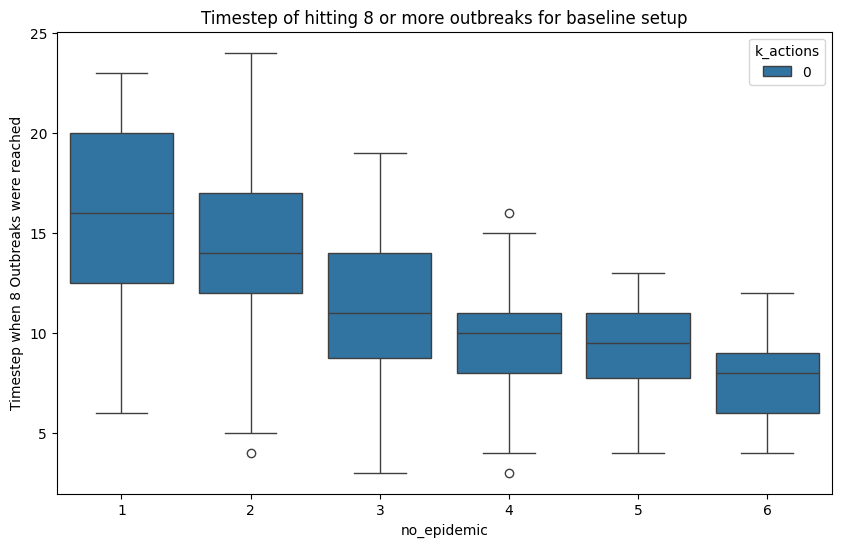

In [ ]:
baseline_df = pd.read_csv('pandemic_baseline_results2.csv')
calculate_probability_heatmap(baseline_df, "baseline")

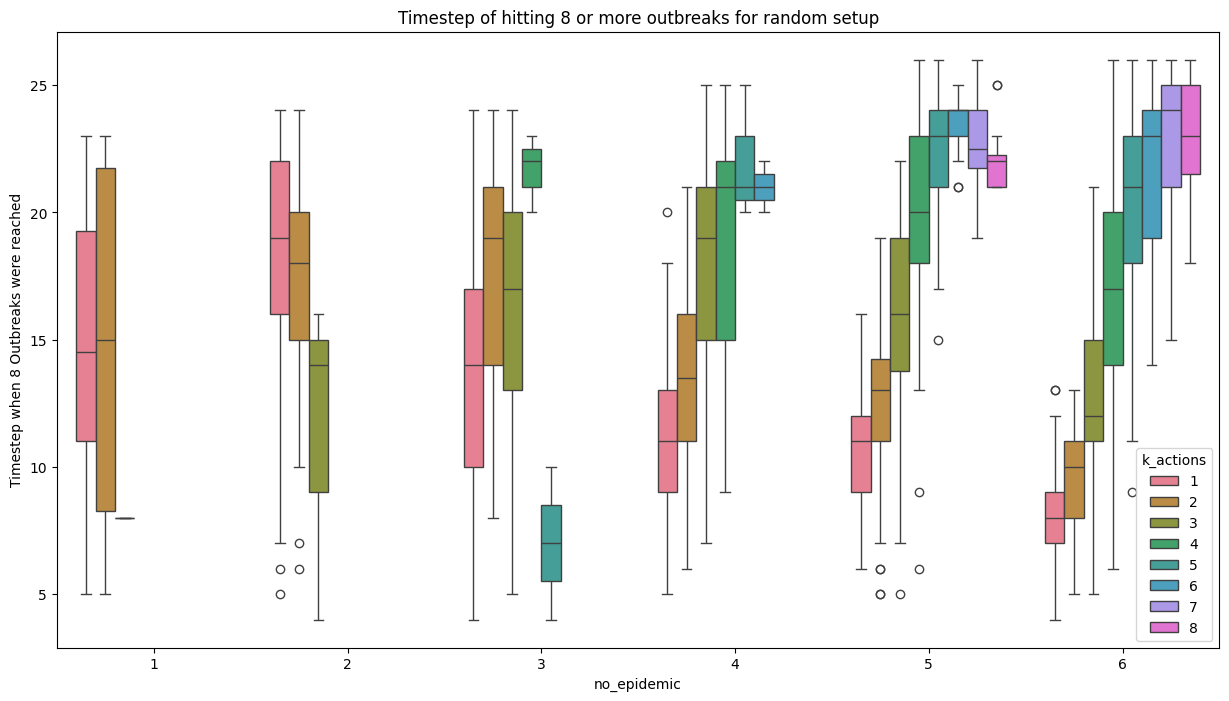

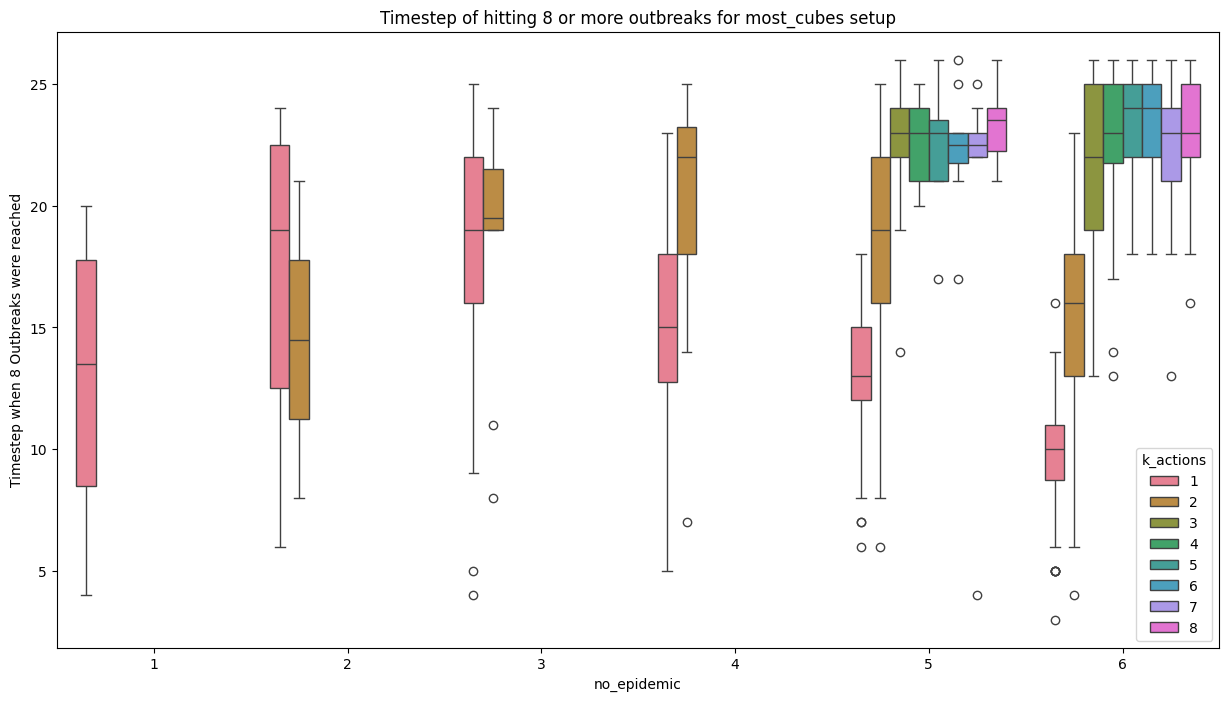

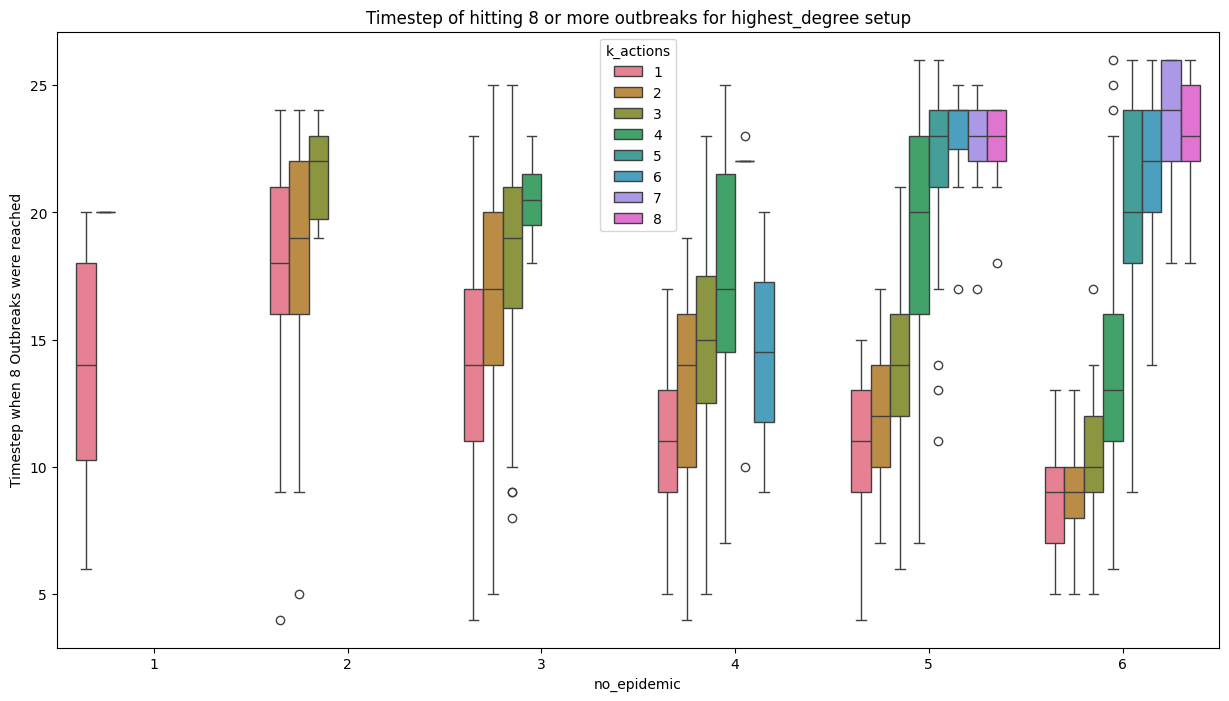

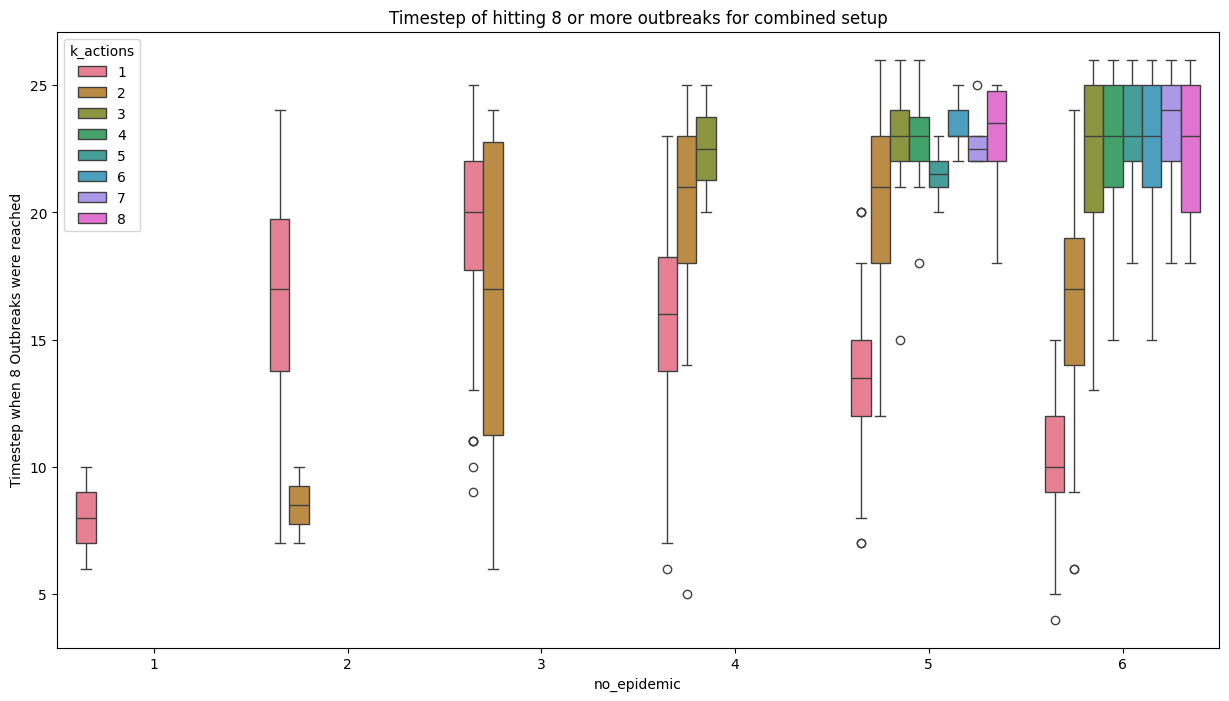

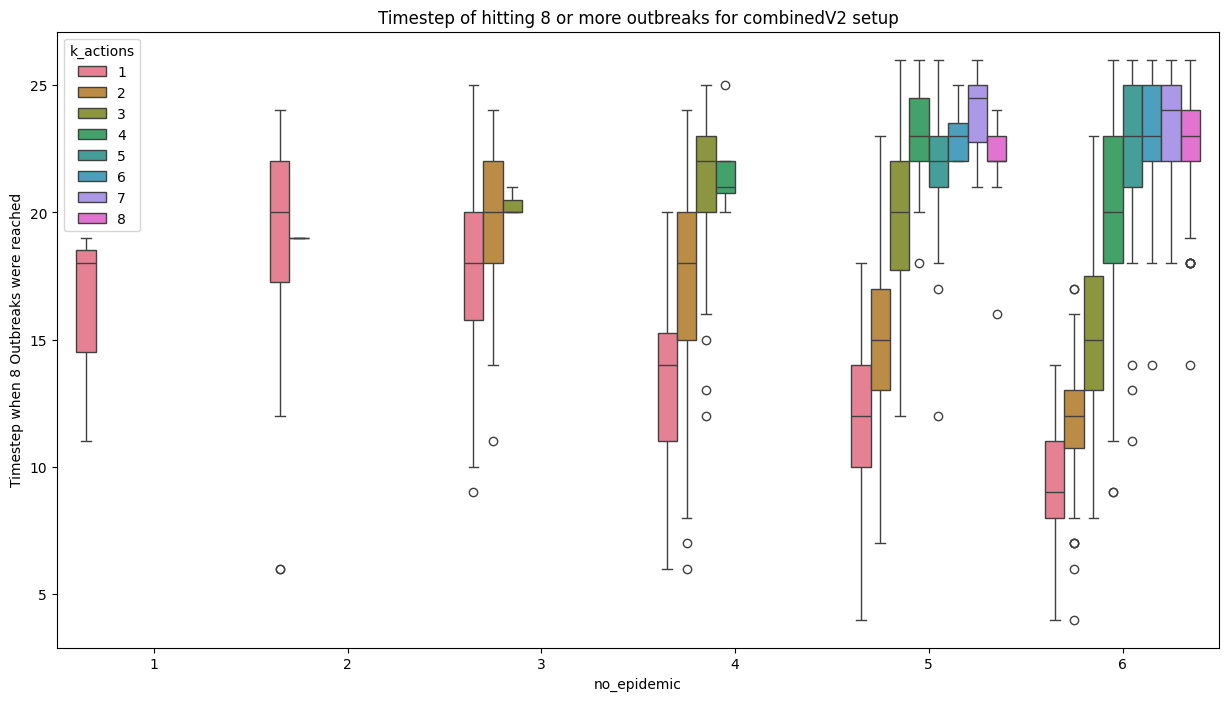

In [13]:
df2 = pd.read_csv('pandemic_all_strategies_results2.csv')
for setup_name in strategies:
    calculate_probability_heatmap(df2, setup_name)